In [1]:
# ============================================
# 🚀 1. Kết nối Google Drive & Cài đặt Dependencies
# ============================================

# 1️⃣ Mount Google Drive để lưu mô hình sau khi train
from google.colab import drive
drive.mount('/content/drive')

# 2️⃣ Cập nhật pip và cài các thư viện cần thiết
!pip install -q --upgrade pip
!pip install -q ultralytics gdown

# 3️⃣ Kiểm tra cài đặt thành công
import torch, ultralytics, gdown

print("✅ Đã kết nối Google Drive và cài đặt dependencies thành công!")
print(f"🔹 PyTorch version: {torch.__version__}")
print(f"🔹 Ultralytics YOLO version: {ultralytics.__version__}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Đã kết nối Google Drive và cài đặt dependencies thành công!
🔹 PyTorch version: 2.8.0+cu126
🔹 Ultralytics YOLO version: 8.3.10


In [2]:
# ============================================
# ⚙️ 2. Cài đặt YOLOv8 (Ultralytics)
# ============================================
from ultralytics import YOLO
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
print("\n✅ YOLOv8 sẵn sàng.")
print(f"🔹 GPU: {'Có' if torch.cuda.is_available() else 'Không có'}")
if torch.cuda.is_available():
    print(f"🔸 Thiết bị: {torch.cuda.get_device_name(0)}")



✅ YOLOv8 sẵn sàng.
🔹 GPU: Không có


In [3]:
# ============================================
# 🧠 3. Huấn luyện mô hình phân loại chó/mèo (YOLOv8n)
# ============================================

import os
os.environ["WANDB_MODE"] = "disabled"

from ultralytics import YOLO
import torch

# Khai báo dataset
DATA_PATH = "/content/drive/MyDrive/colab_data/CatandDogDataset"

model = YOLO("yolov8n-cls.pt")

# Huấn luyện
model.train(
    data=DATA_PATH,
    epochs=10,
    imgsz=224,
    batch=16,
    workers=2,
    exist_ok=True
)



New https://pypi.org/project/ultralytics/8.3.217 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.10 🚀 Python-3.12.12 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/content/drive/MyDrive/colab_data/CatandDogDataset, epochs=10, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=2, project=None, name=train, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, emb

train: Scanning /content/drive/MyDrive/colab_data/CatandDogDataset/train... 2010 images, 0 corrupt: 100%|██████████| 2010/2010 [06:22<00:00,  5.26it/s]


train: New cache created: /content/drive/MyDrive/colab_data/CatandDogDataset/train.cache


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
val: Scanning /content/drive/MyDrive/colab_data/CatandDogDataset/validation... 1000 images, 0 corrupt: 100%|██████████| 1000/1000 [03:22<00:00,  4.94it/s]


val: New cache created: /content/drive/MyDrive/colab_data/CatandDogDataset/validation.cache
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 0 dataloader workers
Logging results to runs/classify/train
Starting training for 10 epochs...

      Epoch    GPU_mem       loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
       1/10         0G     0.8115         16        224:   1%|          | 1/126 [00:04<08:23,  4.03s/it]


100%|██████████| 755k/755k [00:00<00:00, 23.8MB/s]
               classes   top1_acc   top5_acc: 100%|██████████| 32/32 [00:45<00:00,  1.41s/it]

                   all      0.964          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 32/32 [00:30<00:00,  1.05it/s]

                   all      0.979          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 32/32 [00:29<00:00,  1.10it/s]

                   all      0.978          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 32/32 [00:27<00:00,  1.15it/s]

                   all      0.976          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 32/32 [00:29<00:00,  1.08it/s]

                   all      0.974          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 32/32 [00:29<00:00,  1.08it/s]


                   all      0.982          1

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 32/32 [00:28<00:00,  1.13it/s]

                   all      0.983          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 32/32 [00:30<00:00,  1.04it/s]

                   all      0.984          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 32/32 [00:31<00:00,  1.03it/s]

                   all      0.984          1



      Epoch    GPU_mem       loss  Instances       Size


      10/10         0G    0.05475         10        224: 100%|██████████| 126/126 [02:14<00:00,  1.07s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 32/32 [00:30<00:00,  1.05it/s]

                   all      0.985          1



10 epochs completed in 0.467 hours.
Optimizer stripped from runs/classify/train/weights/last.pt, 3.0MB
Optimizer stripped from runs/classify/train/weights/best.pt, 3.0MB

Validating runs/classify/train/weights/best.pt...
Ultralytics 8.3.10 🚀 Python-3.12.12 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
YOLOv8n-cls summary (fused): 73 layers, 1,437,442 parameters, 0 gradients, 3.3 GFLOPs
train: /content/drive/MyDrive/colab_data/CatandDogDataset/train... found 2010 images in 2 classes ✅ 
val: /content/drive/MyDrive/colab_data/CatandDogDataset/validation... found 1000 images in 2 classes ✅ 
test: None...


               classes   top1_acc   top5_acc: 100%|██████████| 32/32 [00:30<00:00,  1.04it/s]


                   all      0.985          1
Speed: 0.0ms preprocess, 15.4ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train
Results saved to runs/classify/train


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b85b068d550>
curves: []
curves_results: []
fitness: 0.9925000071525574
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.9850000143051147, 'metrics/accuracy_top5': 1.0, 'fitness': 0.9925000071525574}
save_dir: PosixPath('runs/classify/train')
speed: {'preprocess': 0.0008974075317382812, 'inference': 15.433470964431763, 'loss': 5.1021575927734375e-05, 'postprocess': 6.818771362304688e-05}
task: 'classify'
top1: 0.9850000143051147
top5: 1.0

In [15]:
# ============================================
# 🧪 4. Đánh giá mô hình trên tập test và lưu kết quả
# ============================================

import os, glob
import matplotlib.pyplot as plt
from ultralytics import YOLO
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# 🔹 Đường dẫn mô hình đã train xong
best_model_path = "runs/classify/train/weights/best.pt"

# 🔹 Thư mục test (chứa cats/ và dogs/)
test_dir = "/content/test"

# Tải mô hình
model = YOLO(best_model_path)
print(f"✅ Đã tải mô hình từ {best_model_path}")

# Lấy danh sách ảnh test (jpg hoặc png)
image_paths = glob.glob(f"{test_dir}/**/*.jpg", recursive=True) + \
              glob.glob(f"{test_dir}/**/*.png", recursive=True)
print(f"🔍 Có {len(image_paths)} ảnh test.\n")

# Nếu không có ảnh, dừng luôn
if len(image_paths) == 0:
    raise ValueError("❌ Không tìm thấy ảnh test trong thư mục /content/test!")

# Dự đoán trên tất cả ảnh test
results = model(image_paths, verbose=False)

# Xác định thứ tự lớp YOLO đã học
print(f"📋 Lớp của mô hình: {model.names}")

# Xây ground truth (0 hoặc 1) dựa trên tên thư mục
y_true = [0 if "cat" in path.lower() else 1 for path in image_paths]

# Lấy nhãn dự đoán (theo chỉ số top1)
y_pred = [r.probs.top1 for r in results if hasattr(r, "probs")]

# Tính độ chính xác
accuracy = accuracy_score(y_true[:len(y_pred)], y_pred)
print(f"🎯 Độ chính xác mô hình trên tập test: {accuracy * 100:.2f}%")

✅ Đã tải mô hình từ runs/classify/train/weights/best.pt
🔍 Có 200 ảnh test.

📋 Lớp của mô hình: {0: 'cats', 1: 'dogs'}
🎯 Độ chính xác mô hình trên tập test: 99.50%


===== THỐNG KÊ MÔ HÌNH =====
Tổng ảnh mèo: 100
Tổng ảnh chó: 100
Ảnh dự đoán đúng: 199
Ảnh dự đoán sai: 1
Accuracy: 99.50% | Precision: 100.00% | Recall: 99.00% | F1: 99.50%

===== Báo cáo chi tiết =====
              precision    recall  f1-score   support

        cats       0.99      1.00      1.00       100
        dogs       1.00      0.99      0.99       100

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200


===== Một số ảnh dự đoán sai (1) =====


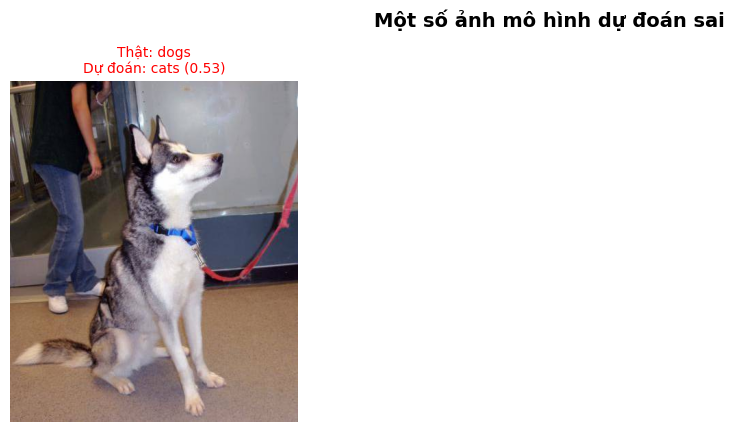

In [19]:
# ============================================
# 📊 THỐNG KÊ VÀ HIỂN THỊ ẢNH DỰ ĐOÁN SAI
# ============================================
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np, random

# --- Tính thống kê cơ bản ---
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='binary')
recall = recall_score(y_true, y_pred, average='binary')
f1 = f1_score(y_true, y_pred, average='binary')

num_cats = sum(np.array(y_true) == 0)
num_dogs = sum(np.array(y_true) == 1)
correct = sum(np.array(y_true) == np.array(y_pred))
wrong = len(y_true) - correct

print("===== THỐNG KÊ MÔ HÌNH =====")
print(f"Tổng ảnh mèo: {num_cats}")
print(f"Tổng ảnh chó: {num_dogs}")
print(f"Ảnh dự đoán đúng: {correct}")
print(f"Ảnh dự đoán sai: {wrong}")
print(f"Accuracy: {accuracy*100:.2f}% | Precision: {precision*100:.2f}% | Recall: {recall*100:.2f}% | F1: {f1*100:.2f}%")

print("\n===== Báo cáo chi tiết =====")
print(classification_report(y_true, y_pred, target_names=list(model.names.values()), digits=2))

# --- Hiển thị một số ảnh bị dự đoán sai ---
wrong_idx = [i for i in range(len(y_true)) if y_true[i] != y_pred[i]]
if len(wrong_idx) == 0:
    print("\n🎉 Mô hình dự đoán đúng toàn bộ ảnh test!")
else:
    print(f"\n===== Một số ảnh dự đoán sai ({len(wrong_idx)}) =====")
    sample_wrong = random.sample(wrong_idx, min(6, len(wrong_idx)))
    plt.figure(figsize=(12, 8))
    for i, idx in enumerate(sample_wrong):
        img = Image.open(image_paths[idx])
        true_lbl = list(model.names.values())[y_true[idx]]
        pred_lbl = list(model.names.values())[y_pred[idx]]
        conf = results[idx].probs.top1conf if hasattr(results[idx], "probs") else 0
        plt.subplot(2, 3, i + 1)
        plt.imshow(img)
        plt.title(f"Thật: {true_lbl}\nDự đoán: {pred_lbl} ({conf:.2f})", color="red", fontsize=10)
        plt.axis("off")
    plt.suptitle("Một số ảnh mô hình dự đoán sai", fontsize=14, fontweight="bold")
    plt.tight_layout()
    plt.show()



image 1/1 /content/test/cats/cat71.jpg: 224x224 cats 1.00, dogs 0.00, 45.6ms
Speed: 15.4ms preprocess, 45.6ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)


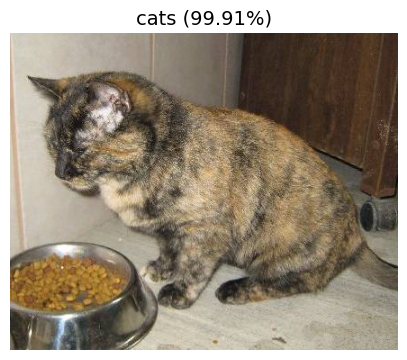

📸 Ảnh: cat71.jpg → Dự đoán: cats (99.91%)


In [25]:
# ============================================
# 🖼️ 6. Hiển thị ảnh ngẫu nhiên và nhãn dự đoán
# ============================================

from PIL import Image
import matplotlib.pyplot as plt
import random
import glob
import os

# 🔹 Lấy danh sách ảnh trong thư mục test
test_images = glob.glob("/content/test/**/*.jpg", recursive=True) + \
              glob.glob("/content/test/**/*.png", recursive=True)

# Kiểm tra có ảnh không
if len(test_images) == 0:
    raise ValueError("❌ Không tìm thấy ảnh trong thư mục /content/test/. Kiểm tra lại cấu trúc thư mục!")

# Chọn ngẫu nhiên 1 ảnh
idx = random.randint(0, len(test_images) - 1)
img_path = test_images[idx]

# Mở ảnh và dự đoán
img = Image.open(img_path)
result = trained_model(img_path)

label = result[0].names[result[0].probs.top1]
conf = result[0].probs.top1conf

# Hiển thị
plt.figure(figsize=(5, 5))
plt.imshow(img)
plt.title(f"{label} ({conf*100:.2f}%)", fontsize=14)
plt.axis('off')
plt.show()

print(f"📸 Ảnh: {os.path.basename(img_path)} → Dự đoán: {label} ({conf*100:.2f}%)")
